# Linear Regression

In [3]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

**Generating data**

<function matplotlib.pyplot.show(close=None, block=None)>

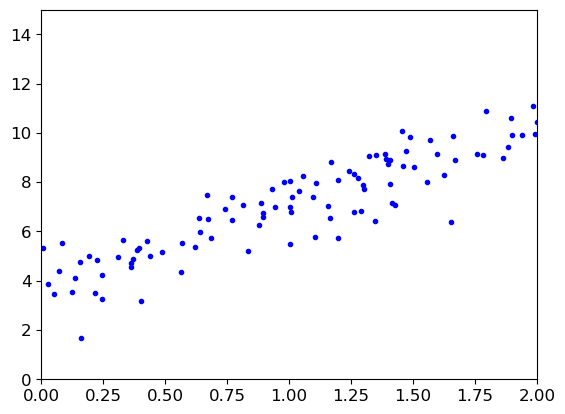

In [4]:
X = 2*np.random.rand(100, 1) # create 100 numbers distribution over [0,2)
y = 4+3*X + np.random.randn(100,1) # + standard normal distribution
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show

Adding '1' column as intercept for original X data.  
If you don't use sklearn package, instead your own function, this is important.

In [5]:
X_b = np.c_[(np.ones((100,1)), X)]
X_b[:5] # check the first 5 rows.

array([[1.        , 0.62138784],
       [1.        , 0.13606975],
       [1.        , 1.24101233],
       [1.        , 0.4389807 ],
       [1.        , 1.3928926 ]])

If you use sklearn, no need for adding '1' column.

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.coef_, lin_reg.intercept_)

[[3.25702407]] [3.76110232]


use the outcome from sklearn to draw a line

<function matplotlib.pyplot.show(close=None, block=None)>

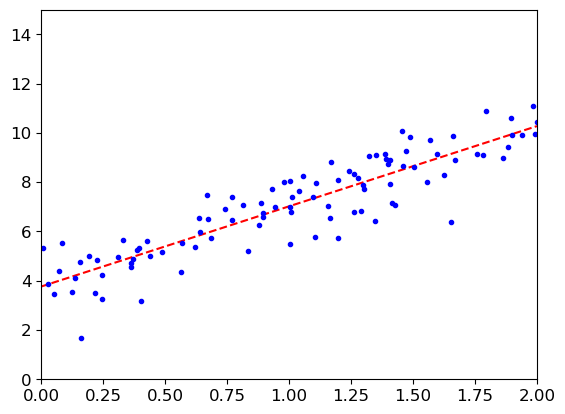

In [7]:
x_new = np.array([[0],[2]])
y_prec = x_new*lin_reg.coef_ + lin_reg.intercept_

plt.plot(x_new, y_prec, 'r--')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show

### A polynomial regression

create samples

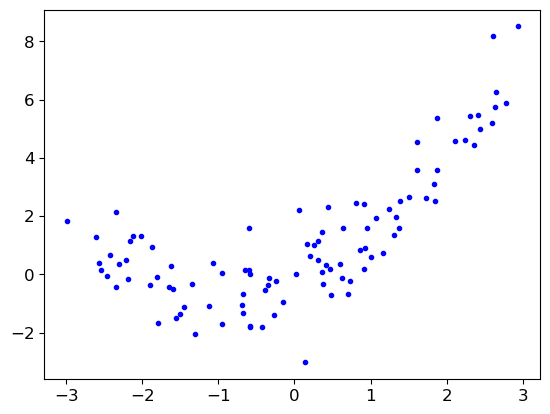

In [8]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + np.random.randn(m,1)
plt.plot(X,y,'b.')
plt.show()

use sklearn to train this regression  
Firstly, processing feature with polynomial.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# the original feature just has X,
# after polynomial transform, the feature are X X^2
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.90175744])

Secondly, training the regression model

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.coef_, lin_reg.intercept_)
# two coefficients the first one is for X, second is for X^2

[[1.00870237 0.55436086]] [-0.1985332]


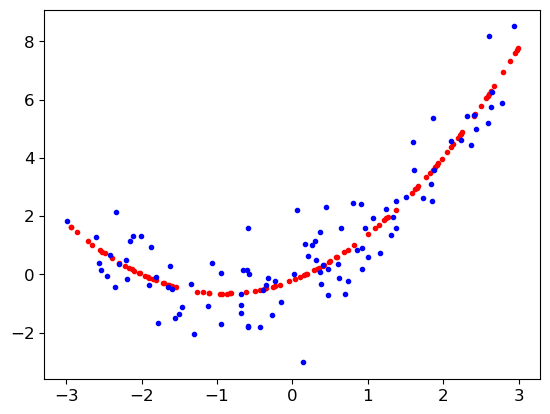

In [11]:
# get the regression line
x_new = np.random.uniform(-3,3,100)
y_prec = lin_reg.coef_[0][0]*x_new + lin_reg.coef_[0][1]*x_new**2 + lin_reg.intercept_
plt.plot(x_new, y_prec, 'r.')
plt.plot(X,y,'b.')
plt.show()

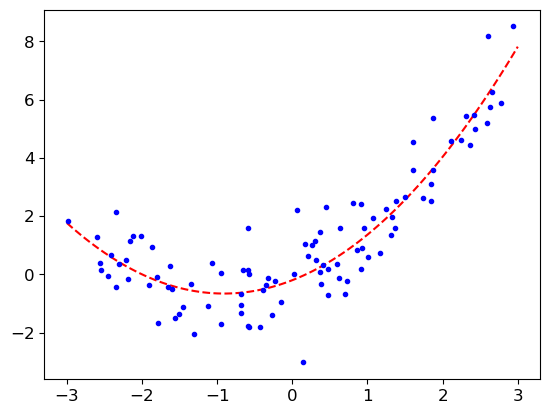

In [12]:
# another way to get the regression line
x_new_2 = np.linspace(-3,3,100).reshape(100,1)
x_new_2_poly = poly_features.transform(x_new_2)
y_prec_2 = lin_reg.predict(x_new_2_poly)
plt.plot(x_new_2, y_prec_2, 'r--')
plt.plot(X,y,'b.')
plt.show()

Comparison experiment for different degrees for polynomial.  
To learn what is over fit

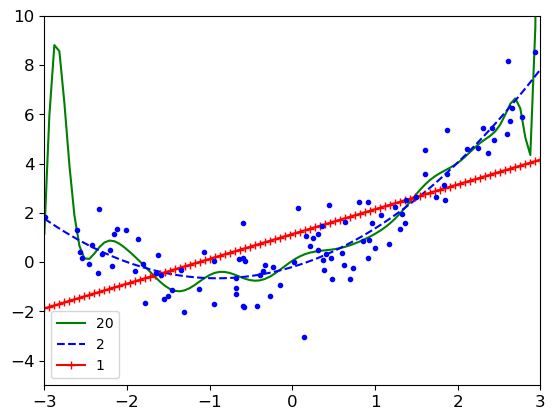

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

for style, degree in (('g-', 20),('b--', 2),('r-+', 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_reg = Pipeline([
        ('poly_features', poly_features),
        ('StandardScaler', std),
        ('lin_reg', lin_reg)
    ])
    polynomial_reg.fit(X,y)
    y_new_pip = polynomial_reg.predict(x_new_2)
    plt.plot(x_new_2, y_new_pip, style, label=str(degree))
    
plt.plot(X, y, 'b.')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

## How to evaluate the performance of the ML model

Check the how does the number of training sample affect the outcomes.

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), 'r-', label='train_error')
    plt.plot(np.sqrt(val_errors), 'b-', label='val_error')
    plt.legend()

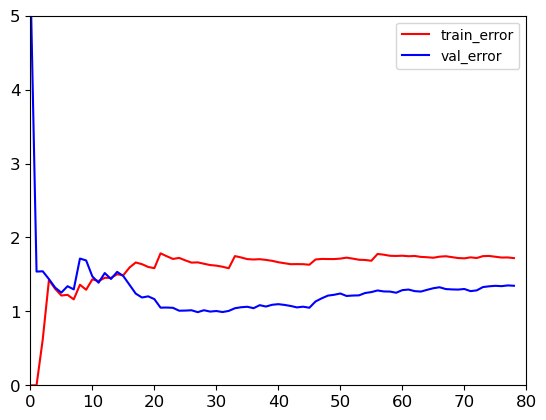

In [18]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0,80,0,5])
plt.show()

### Regularization

Generate sample data

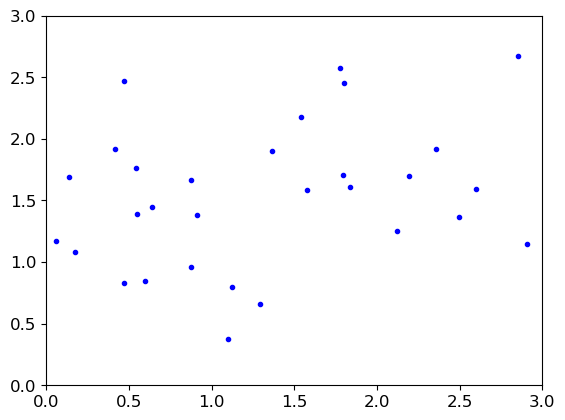

In [33]:
np.random.seed(42)
m=30
X = 3*np.random.rand(m,1)
y = 0.5*X + np.random.randn(m,1)/1.5 + 1
X_new = np.linspace(0,3,100).reshape(100,1)
plt.plot(X,y,'b.')
plt.axis([0,3,0,3])
plt.show()

define a function that for experiment with different regularization.  

In [46]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r.')):
        model = model_class(alpha, **model_kargs)
        if polynomial:
            model = Pipeline([
                ('polu_features', PolynomialFeatures(degree=10, include_bias=False)),
                ('StandardScaler', StandardScaler()),
                ('lin_reg', model)
            ]
            )
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, label='alpha={}'.format(alpha))
    plt.plot(X, y, 'b.')
    plt.legend()

call the function above with Ridge regression and generate chart

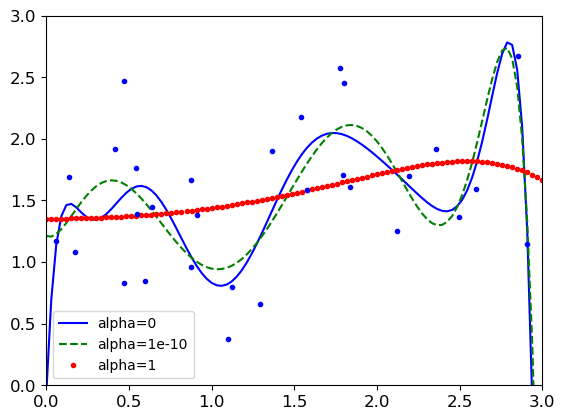

In [47]:
from sklearn.linear_model import Ridge

plot_model(Ridge, polynomial=True, alphas=(0, 10**-10, 1))
plt.axis([0,3,0,3])
plt.show()
# the the regression line to be more smooth with regularization

call the function above with Lasso regression and generate chart

/Users/leeveschou/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/leeveschou/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/leeveschou/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.222e+00, tolerance: 9.710e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

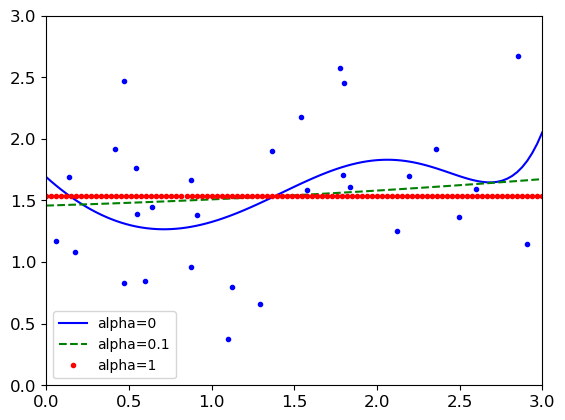

In [51]:
from sklearn.linear_model import Lasso

plot_model(Lasso, polynomial=True, alphas=(0, 10**-1, 1))
plt.axis([0,3,0,3])
plt.show()